# Credit Card Fraud Detecttion

## Import Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import required libraries from Scikit Learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the training and testing datasets


In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Codsoft dataset/Credit Card/fraudTrain.csv")
test_dataset  = pd.read_csv("/content/drive/MyDrive/Codsoft dataset/Credit Card/fraudTest.csv")

## Display initial dataset samples


In [ ]:
print("Preview of training dataset:")
print(train_dataset.head())
print("Preview of test dataset:")
print(test_dataset.head())

Preview of training dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Ri

## Identify missing values


In [ ]:
print("Missing values in training data:")
print(train_dataset.isnull().sum(),"\n")
print("Missing values in test data:")
print(test_dataset.isnull().sum())

Missing values in training data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64 

Missing values in test data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state

## Drop rows with missing values


In [ ]:
train_dataset.dropna(inplace=True)
test_dataset.dropna(inplace=True)

## Columns to remove due to irrelevance


In [ ]:
irrelevant_columns = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'dob', 'trans_num']
train_dataset.drop(columns=irrelevant_columns, inplace=True)
test_dataset.drop(columns=irrelevant_columns, inplace=True)

## Encoding categorical attributes


In [ ]:
encoding_map = {}
categorical_features = ['merchant', 'category', 'gender', 'city', 'state', 'job']

In [ ]:
for feature in categorical_features:
    encoder = LabelEncoder()
    train_dataset[feature] = encoder.fit_transform(train_dataset[feature])
    test_dataset[feature] = test_dataset[feature].apply(lambda val: encoder.transform([val])[0] if val in encoder.classes_ else -1)
    encoding_map[feature] = encoder

## Splitting dataset into input features and labels


In [ ]:
features_train = train_dataset.drop(columns=['is_fraud'])
labels_train = train_dataset['is_fraud']

In [ ]:
features_test = test_dataset.drop(columns=['is_fraud'])
labels_test = test_dataset['is_fraud']

## Applying feature scaling


In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

## Initialize and train the fraud detection model


In [ ]:
fraud_model = RandomForestClassifier(n_estimators=100, random_state=42)
fraud_model.fit(features_train, labels_train)

RandomForestClassifier(random_state=42)

## Generate predictions


In [ ]:
predicted_labels = fraud_model.predict(features_test)

## Model evaluation


In [ ]:
print("Model Performance Accuracy:", accuracy_score(labels_test, predicted_labels))
print("Detailed Classification Report:")
print(classification_report(labels_test, predicted_labels))

Model Performance Accuracy: 0.9970650634583306
Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.73      0.38      0.50      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.69      0.75    555719
weighted avg       1.00      1.00      1.00    555719



## Visualizing confusion matrix


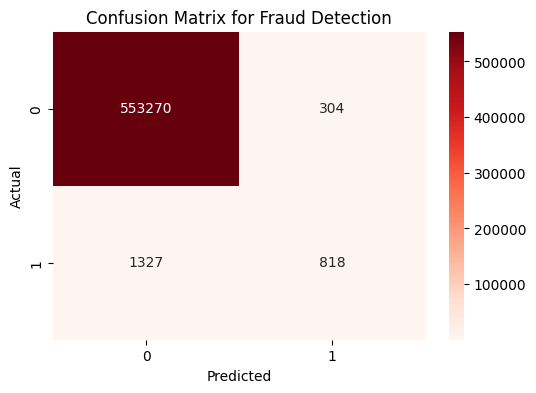

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(labels_test, predicted_labels), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Fraud Detection")
plt.show()